In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
file_path = "Netflix Dataset (5).csv.xlsx"
df = pd.read_excel(file_path)

In [70]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [72]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

In [73]:
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

In [74]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year
0,s1,TV Show,0.03,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,07:19:00,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


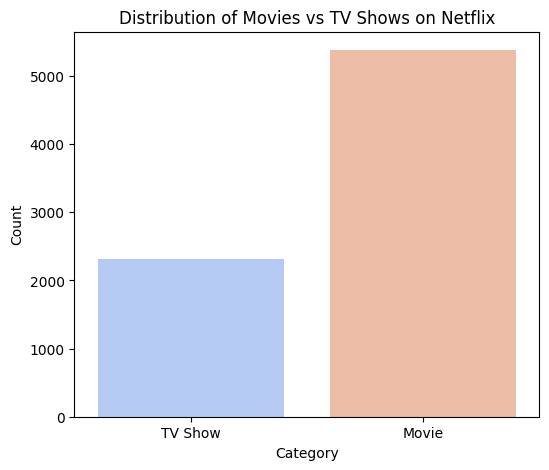

In [75]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Category', palette='coolwarm', hue='Category', legend=False)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

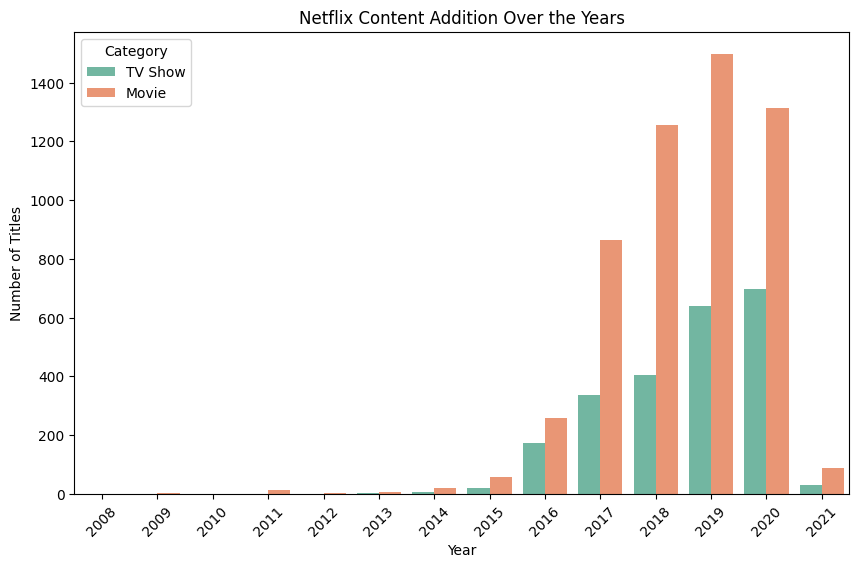

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', hue='Category', palette='Set2')
plt.title('Netflix Content Addition Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

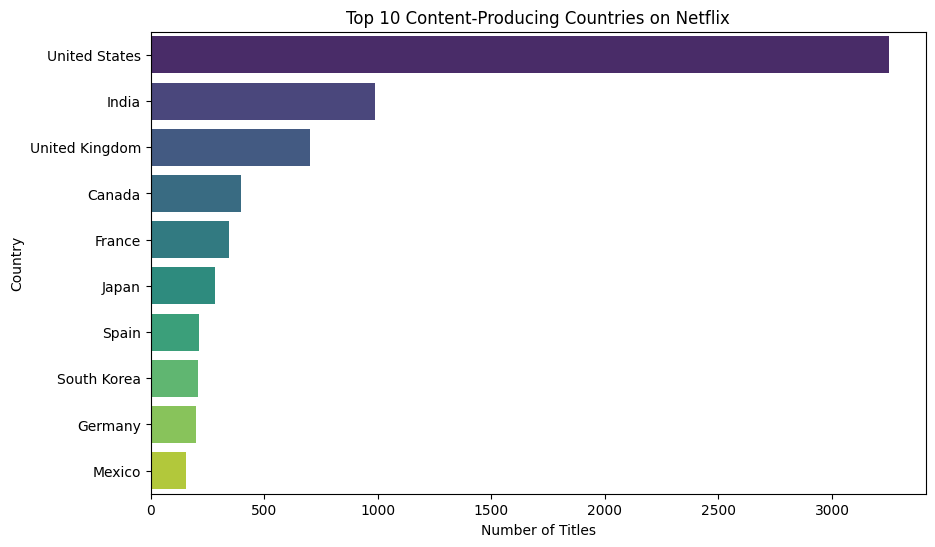

In [77]:
top_countries = (df['Country'].dropna()
                 .str.split(', ')
                 .explode()
                 .value_counts()
                 .head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', hue=top_countries.index, legend=False)
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

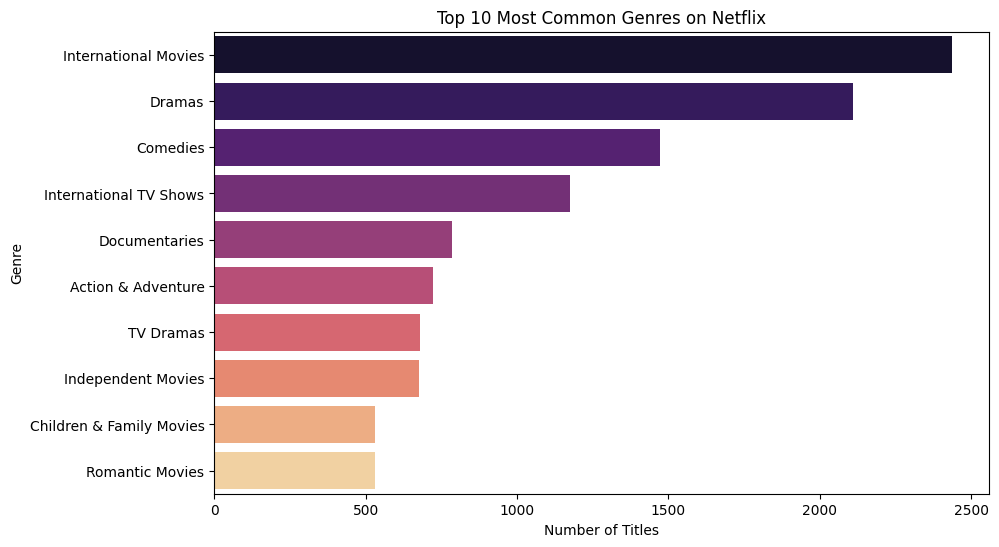

In [78]:
genre_counts = (df['Type']
                .dropna()
                .str.split(', ')
                .explode()
                .value_counts()
                .head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma', hue=genre_counts.index, legend=False)
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

<Figure size 1200x600 with 0 Axes>

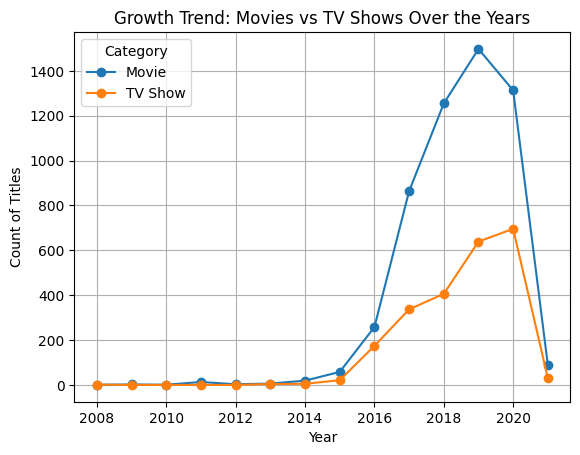

In [79]:
content_trend = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
content_trend.plot(kind='line', marker='o')
plt.title('Growth Trend: Movies vs TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Titles')
plt.grid(True)
plt.show()

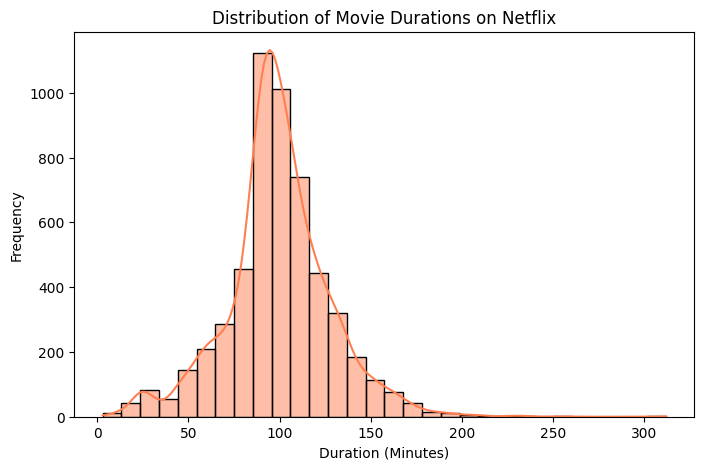

In [80]:
movies = df[df['Category'] == 'Movie'].copy()
movies['Minutes'] = movies['Duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(8, 5))
sns.histplot(movies['Minutes'], bins=30, kde=True, color='coral')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()